In [1]:
a = 1
a

1

In [2]:
a += 2

In [3]:
a

3

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame(
    {
        "employee_id": [101, 102, 103, 104],
        "name": ["Tom", "Brain", "Lisa", "Roy"],
        "score1": [587, 725, 962, 997],
        "score2": [901, 690, 933, 982],
    }
)
df

,employee_id,name,score1,score2
0,101,Tom,587,901
1,102,Brain,725,690
2,103,Lisa,962,933
3,104,Roy,997,982


In [6]:
df.name

0      Tom
1    Brain
2     Lisa
3      Roy
Name: name, dtype: object

In [7]:
df.employee_id

0    101
1    102
2    103
3    104
Name: employee_id, dtype: int64

In [8]:
type(df.name)

pandas.core.series.Series

In [9]:
df["score3"] = df["score1"] + df["score2"]
df

,employee_id,name,score1,score2,score3
0,101,Tom,587,901,1488
1,102,Brain,725,690,1415
2,103,Lisa,962,933,1895
3,104,Roy,997,982,1979


In [10]:
df.to_csv("employees.csv", index=False)

In [11]:
df1 = pd.read_csv("employees.csv")

In [12]:
df1

,employee_id,name,score1,score2,score3
0,101,Tom,587,901,1488
1,102,Brain,725,690,1415
2,103,Lisa,962,933,1895
3,104,Roy,997,982,1979


In [13]:
import matplotlib.pyplot as plt

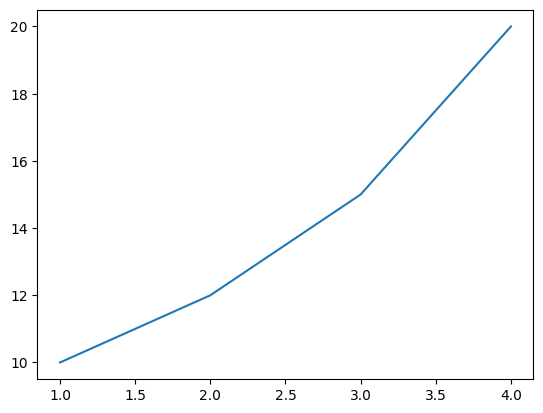

In [14]:
x = [1, 2, 3, 4]
y = [10, 12, 15, 20]
plt.plot(x, y);

In [15]:
from sklearn import datasets

diabetes = datasets.load_diabetes()

In [16]:
df = pd.DataFrame(
    diabetes.data,
    columns=diabetes.feature_names
)
df["target"] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="target")
y = df["target"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

In [19]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [20]:
pd.DataFrame(
    {
        "pred": y_pred,
        "test": y_test,
    }
)

,pred,test
246,119.142359,78.0
425,110.771833,152.0
293,185.037506,200.0
31,68.009971,59.0
359,171.054442,311.0
...,...,...
277,113.349695,64.0
132,111.447596,107.0
213,98.354643,49.0
286,73.104204,60.0


In [21]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.4384316213369278

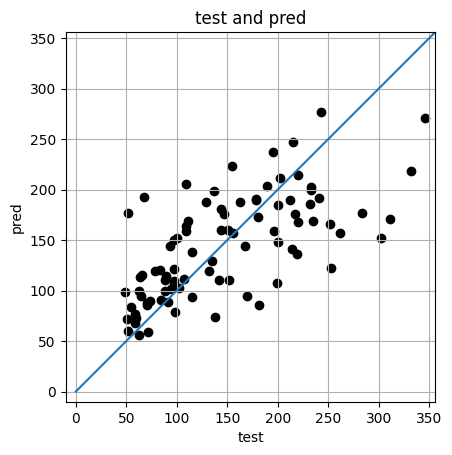

In [22]:
plt.axes().set_aspect("equal", adjustable="box")
plt.scatter(y_test, y_pred, color="black")
max_value = max([max(y_pred), max(y_test)])
plt.xlim(-10, max_value+10)
plt.ylim(-10, max_value+10)

plt.plot([0, max_value+10], [0, max_value+10])
plt.xlabel("test")
plt.ylabel("pred")
plt.title("test and pred")
plt.grid(which="both")
plt.show()

In [23]:
import pandas as pd

df = pd.read_csv("yomilog.csv")
df

,name,title,price
0,yukie,たのしいPython,3000
1,altnight,たのしいPython,3000
2,furi,たのしいPython,3000
3,mtb,たのしいPython,3000
4,susumuis,おいしいPython,1000
5,altnight,やさしいNumPy,4000
6,yukie,やさしいNumPy,4000
7,mtb,やさしいNumPy,4000
8,yukie,難しい機械学習,2000
9,mtb,難しい機械学習,2000


### データの前処理

In [26]:
# 既読の書籍
titles_set = df.loc[df["name"] == "susumuis", "title"].unique()
titles_set

array(['おいしいPython', 'かんたんDjango'], dtype=object)

In [27]:
# 未読の書籍
df_filtered = df[~df["title"].isin(titles_set)]

In [33]:
df_filtered

,name,title,price
0,yukie,たのしいPython,3000
1,altnight,たのしいPython,3000
2,furi,たのしいPython,3000
3,mtb,たのしいPython,3000
5,altnight,やさしいNumPy,4000
6,yukie,やさしいNumPy,4000
7,mtb,やさしいNumPy,4000
8,yukie,難しい機械学習,2000
9,mtb,難しい機械学習,2000


In [34]:
df_books = (
    df_filtered.groupby("title")
    .agg({"name": "nunique", "price": "first"})
    .reset_index()
    .rename(columns={"name": "n_readers"})
)
df_books

,title,n_readers,price
0,たのしいPython,4,3000
1,やさしいNumPy,3,4000
2,難しい機械学習,2,2000


### モデルの定義

In [40]:
from mip import Model

m = Model()
# 変数:書籍をおすすめする=1, しない=0
df_books["Var_x"] = m.add_var_tensor((len(df_books),), "x", var_type="B")
df_books

,title,n_readers,price,Var_x,Val_x
0,たのしいPython,4,3000,x_0,1.0
1,やさしいNumPy,3,4000,x_1,0.0
2,難しい機械学習,2,2000,x_2,1.0


In [41]:
from mip import maximize, xsum

# 目的変数:同僚の多くが読んでいる書籍をなるべく多くおすすめする
m.objective = maximize(xsum(df_books["n_readers"] * df_books["Var_x"]))
# 制約条件:金額が予算以内
m += xsum(df_books["price"] * df_books["Var_x"]) <= 5000

### 解を得る

In [37]:
m.optimize()

Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Oct 24 2021 

Starting solution of the Linear programming relaxation problem using Primal Simplex

Coin0506I Presolve 1 (0) rows, 3 (0) columns and 3 (0) elements
Clp1000I sum of infeasibilities 0 - average 0, 3 fixed columns
Coin0506I Presolve 0 (-1) rows, 0 (-3) columns and 0 (-3) elements
Clp0000I Optimal - objective value -0
Clp0000I Optimal - objective value -0
Coin0511I After Postsolve, objective 0, infeasibilities - dual 0 (0), primal 0 (0)
Clp0000I Optimal - objective value 6
Clp0000I Optimal - objective value 6
Clp0000I Optimal - objective value 6
Clp0032I Optimal objective 6 - 0 iterations time 0.052, Idiot 0.03

Starting MIP optimization


<OptimizationStatus.OPTIMAL: 0>

In [38]:
df_books["Val_x"] = df_books["Var_x"].astype(float)
df_books

,title,n_readers,price,Var_x,Val_x
0,たのしいPython,4,3000,x_0,1.0
1,やさしいNumPy,3,4000,x_1,0.0
2,難しい機械学習,2,2000,x_2,1.0


In [39]:
df_books[df_books["Val_x"] > 0.5]["title"].to_list()

['たのしいPython', '難しい機械学習']

### コードを一般化する

In [42]:
def optimize_book_to_buy(name, money):
    # 既読の書籍
    name_titles_set = df.loc[df["name"] == name, "title"].unique()
    # 未読の書籍
    df_filtered = df[~df["title"].isin(name_titles_set)]

    # 書籍ごとのタイトル、価格、読んだ人数を集計
    df_books = (
        df_filtered.groupby("title")
        .agg({"name": "nunique", "price": "first"})
        .reset_index()
        .rename(columns={"name": "n_readers"})
    )

    # モデルの作成と変数定義
    m = Model()
    # 変数:書籍をおすすめする=1, しない=0
    df_books["Var_x"] = m.add_var_tensor((len(df_books),), "x", var_type="B")
    # 目的変数:同僚の多くが読んでいる書籍をなるべく多くおすすめする
    m.objective = maximize(xsum(df_books["n_readers"] * df_books["Var_x"]))
    # 制約条件:金額が予算以内
    m += xsum(df_books["price"] * df_books["Var_x"]) <= money

    # 最適化の実行
    m.optimize()

    # 結果の取得
    df_books["Val_x"] = df_books["Var_x"].astype(float)
    # 誤差による不具合を防ぐため0.5を境界に比較
    return df_books[df_books["Val_x"] > 0.5]["title"].to_list()

In [43]:
# 全員に対して、1000円刻みの予算で結果を取得する
results = []
for name in df["name"].unique():
    for money in [1000, 2000, 3000, 4000, 5000]:
        book_to_buy = optimize_book_to_buy(name, money)
        results.append((name, money, book_to_buy))

result_df = pd.DataFrame(results, columns=["name", "money", "book_to_buy"])
result_df

Cgl0004I processed model has 1 rows, 3 columns (3 integer (3 of which binary)) and 3 elements
Coin3009W Conflict graph built in 0.002 seconds, density: 23.810%
Cgl0015I Clique Strengthening extended 0 cliques, 0 were dominated
Cbc0045I Nauty did not find any useful orbits in time 0.003002
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of -6
Cbc0038I Before mini branch and bound, 3 integers at bound fixed and 0 continuous
Cbc0038I Mini branch and bound did not improve solution (0.07 seconds)
Cbc0038I After 0.07 seconds - Feasibility pump exiting with objective of -6 - took 0.01 seconds
Cbc0012I Integer solution of -6 found by feasibility pump after 0 iterations and 0 nodes (0.07 seconds)
Cbc0001I Search completed - best objective -6, took 0 iterations and 0 nodes (0.07 seconds)
Cbc0035I Maximum depth 0, 0 variables fixed on reduced cost
Total time (CPU seconds):       0.08   (Wallclock seconds):       0.08

Starting solution of the Linear programming rel

,name,money,book_to_buy
0,yukie,1000,[おいしいPython]
1,yukie,2000,[おいしいPython]
2,yukie,3000,[おいしいPython]
3,yukie,4000,[おいしいPython]
4,yukie,5000,[おいしいPython]
5,altnight,1000,[おいしいPython]
6,altnight,2000,[難しい機械学習]
7,altnight,3000,"[おいしいPython, 難しい機械学習]"
8,altnight,4000,"[おいしいPython, かんたんDjango]"
9,altnight,5000,"[かんたんDjango, 難しい機械学習]"
